In [1]:
#Ignore all the warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Statiscal Summary of dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB
None


<Figure size 2880x1440 with 0 Axes>

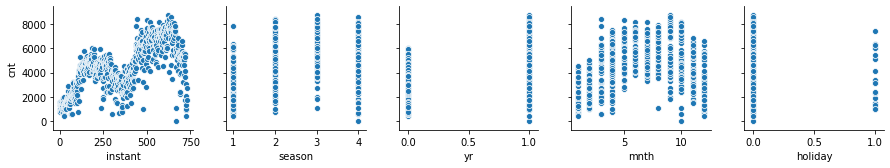

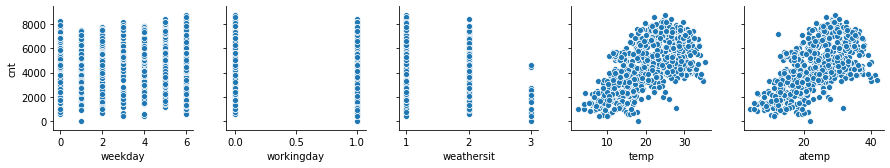

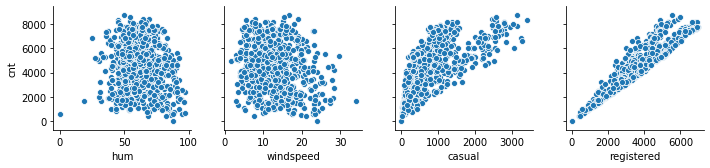

In [7]:
#Plotting the independent variable to the dependent variable to check for linear relationship
plt.figure(figsize=(40,20))
sns.pairplot(x_vars = ['instant','season','yr','mnth','holiday'],y_vars = 'cnt',data =df)
plt.show()
sns.pairplot(x_vars = ['weekday','workingday','weathersit','temp','atemp'],y_vars = 'cnt',data =df)
plt.show()
sns.pairplot(x_vars = ['hum','windspeed','casual','registered'],y_vars = 'cnt',data =df)
plt.show()

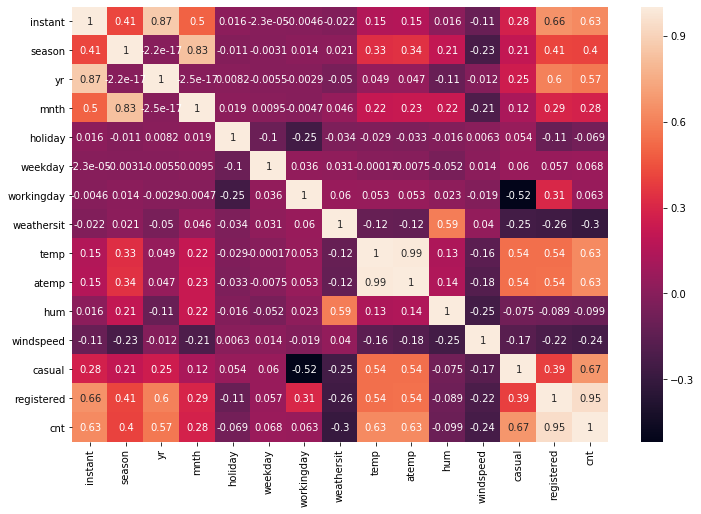

In [8]:
#Another way to visualise is heat maps
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [10]:
#Import neccessary libraries for modelling
import statsmodels
import statsmodels.api as sn
import sklearn
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
num_vars = ['instant', 'season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit','casual','registered']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,0.896978,16-10-2019,1.000000,1.0,0.818182,0.0,0.333333,1.0,0.0,19.201653,23.0423,55.8333,12.208807,0.280402,0.951776,7534
576,0.791209,31-07-2019,0.666667,1.0,0.545455,0.0,0.333333,1.0,0.0,29.246653,33.1448,70.4167,11.083475,0.294422,0.899220,7216
426,0.585165,03-03-2019,0.000000,1.0,0.181818,0.0,1.000000,0.0,0.5,16.980847,20.6746,62.1250,10.792293,0.290765,0.446145,4066
728,1.000000,30-12-2019,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,10.489153,11.5850,48.3333,23.500518,0.110332,0.203869,1796
482,0.662088,28-04-2019,0.333333,1.0,0.272727,0.0,1.000000,0.0,0.5,15.443347,18.8752,48.9583,8.708325,0.340750,0.444701,4220


### Dividing into X and Y sets for the model building

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
instant       510 non-null float64
dteday        510 non-null object
season        510 non-null float64
yr            510 non-null float64
mnth          510 non-null float64
holiday       510 non-null float64
weekday       510 non-null float64
workingday    510 non-null float64
weathersit    510 non-null float64
temp          510 non-null float64
atemp         510 non-null float64
hum           510 non-null float64
windspeed     510 non-null float64
casual        510 non-null float64
registered    510 non-null float64
dtypes: float64(14), object(1)
memory usage: 83.8+ KB


In [40]:
#df_train = df_train.drop(columns = ['dteday'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
instant       510 non-null float64
season        510 non-null float64
yr            510 non-null float64
mnth          510 non-null float64
holiday       510 non-null float64
weekday       510 non-null float64
workingday    510 non-null float64
weathersit    510 non-null float64
temp          510 non-null float64
atemp         510 non-null float64
hum           510 non-null float64
windspeed     510 non-null float64
casual        510 non-null float64
registered    510 non-null float64
dtypes: float64(14)
memory usage: 79.8 KB


In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

ValueError: could not convert string to float: '16-10-2019'

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'X_train_new' is not defined

In [27]:
#Model 1: Including registered column as it has the highest correlation with cnt
X = df['registered']
y = df['cnt']



X_train_sm = sn.add_constant(X_train)
X_train_sm.head(5)

lr = sn.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         191.149100
registered      1.182153
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.558e+32
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:08:03   Log-Likelihood:                 13169.
No. Observations:                 510   AIC:                        -2.633e+04
Df Residuals:                     507   BIC:                        -2.632e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.467e-12   1.64e-13     21.177      0.000    3.15e-12    3.79e-12
registered     1.0000   4.55e-17    2.2e+16      0.000       1.000       1.000
casual         1.0000   1.05e-16   9.52e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       16.981   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.489
Skew:                           0.277   Prob(JB):                      0.00194
Kurtosis:                       2.469   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Since, R-squared value came to be 0.90, which is actually a good. Value of P-value is greater than significance level,hence indicating the variable to be significant for prediction of target variable.
### Still we will take into account another variable named Casual which has 2nd highest correlation with cnt

In [30]:
#Model 2: Including casual column as it has thesecond  highest correlation with cnt
X = df[['registered','casual']]
y = df['cnt']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=70)

X_train_sm = sn.add_constant(X_train)
X_train_sm.head(5)

lr = sn.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const         3.467449e-12
registered    1.000000e+00
casual        1.000000e+00
dtype: float64

In [41]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.558e+32
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:10:59   Log-Likelihood:                 13169.
No. Observations:                 510   AIC:                        -2.633e+04
Df Residuals:                     507   BIC:                        -2.632e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.467e-12   1.64e-13     21.177      0.000    3.15e-12    3.79e-12
registered     1.0000   4.55e-17    2.2e+16      0.000       1.000       1.000
casual         1.0000   1.05e-16   9.52e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       16.981   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.489
Skew:                           0.277   Prob(JB):                      0.00194
Kurtosis:                       2.469   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R squared came out to be 1.00 indicating the two  variable - Casual and Registered are best predictors for cnt ,target variable.
### Also, since p value is significant and F statsitics is quite low

In [32]:
#Predicting the model on the test dataset
y_train_pred = lr_model.predict(X_train_sm)

In [33]:
y_train_pred

692    2277.0
127    4333.0
133    3409.0
524    7498.0
209    3846.0
322    3663.0
104    3126.0
159    3915.0
84     2496.0
395    4509.0
203    3285.0
287    5217.0
574    6597.0
161    4966.0
531    7702.0
412    4154.0
621    8009.0
581    5464.0
1       801.0
691    3910.0
532    6978.0
243    5115.0
24     1985.0
391    3456.0
710    5319.0
501    7384.0
11     1162.0
190    4881.0
695    3959.0
120    3351.0
        ...  
701    6234.0
34     1708.0
343    3190.0
78     2471.0
547    6227.0
651    6639.0
522    7494.0
527    4972.0
610    6034.0
60     2134.0
661    7693.0
184    6043.0
602    5255.0
77     3117.0
297    4687.0
641    7328.0
727    1341.0
279    4985.0
712    5611.0
615    5976.0
340     705.0
629    8395.0
341    3322.0
117    4058.0
436    5847.0
59     1851.0
316    3717.0
114    4073.0
214    3574.0
334    3727.0
Length: 510, dtype: float64

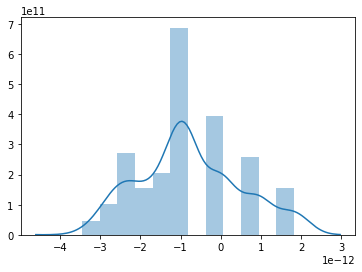

In [35]:
#Plotting the residuals
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.show()

In [36]:
#Adding constant to the test dataset
X_test_sm  = sn.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
#Calculating R2 for the test dataset
r2 = r2_score(y_true = y_test,y_pred=y_test_pred)

In [39]:
r2

1.0

### R2 came out to be 100% , same as the training dataset